In [3]:
import pandas as pd
import json
import numpy as np
from scipy.stats import spearmanr

Read dataset

In [4]:
file_path = 'data/expunations_annotated_full.json'

with open(file_path, 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            1899 non-null   object
 1   Understand the text?          1899 non-null   object
 2   Offensive/Inappropriate?      1899 non-null   object
 3   Is a Joke?                    1899 non-null   object
 4   Funniness (1-5)               1899 non-null   object
 5   Natural language explanation  1899 non-null   object
 6   Joke keywords                 1899 non-null   object
 7   Annotator_IDs                 1899 non-null   object
dtypes: object(8)
memory usage: 118.8+ KB


In [6]:
df.head()

,ID,Understand the text?,Offensive/Inappropriate?,Is a Joke?,Funniness (1-5),Natural language explanation,Joke keywords,Annotator_IDs
0,hom_362,"[1, 1, 1, 1, 0]","[0, 1, 0, 0, ]","[1, 0, 1, 0, 0]","[2, 0, 1, 0, 0]",[Talking about being true as in being real or ...,"[[true, teeth, false], [], [be true, teeth, fa...","[0, 1, 2, 3, 4]"
1,het_837,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[3, 4, 2, 1, 2]","[absinthe sounds like absent , This is a play ...","[[drinking, leave of absinthe], [Drinking too ...","[0, 1, 2, 3, 4]"
2,het_635,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[3, 3, 1, 2, 2]","[root sounds like route , This is a play on wo...","[[animals, soil, escape root], [Animals, tunne...","[0, 1, 2, 3, 4]"
3,hom_657,"[1, 0, 1, 1, 0]","[0, , 0, 0, ]","[1, 0, 0, 1, 0]","[2, 0, 0, 1, 0]",[the phrase dish it out means to criticizie an...,"[[waitress's, dish it out], [], [], [waitress,...","[0, 1, 2, 3, 4]"
4,het_1275,"[0, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[0, 1, 1, 1, 1]","[0, 2, 1, 1, 2]","[, This is a play on words. Sense of humor mea...","[[], [gossip, sense of rumor], [gossip, sense ...","[0, 1, 2, 3, 4]"


In [20]:
# dataframe that contains the ID as the index and funniness
df_funniness = df[['ID', 'Funniness (1-5)', 'Annotator_IDs']].set_index('ID')
df_funniness.head()

,Funniness (1-5),Annotator_IDs
ID,,
hom_362,"[2, 0, 1, 0, 0]","[0, 1, 2, 3, 4]"
het_837,"[3, 4, 2, 1, 2]","[0, 1, 2, 3, 4]"
het_635,"[3, 3, 1, 2, 2]","[0, 1, 2, 3, 4]"
hom_657,"[2, 0, 0, 1, 0]","[0, 1, 2, 3, 4]"
het_1275,"[0, 2, 1, 1, 2]","[0, 1, 2, 3, 4]"


In [44]:
annotators = set()
jokes = {}
scores = {}

# iterate over the df_funniness
for index, row in df_funniness.iterrows():
    # Access the values of each column in the current row
    id_value = index
    funniness = row['Funniness (1-5)']
    annotator_ids = row['Annotator_IDs']
   
    for id in range(len(annotator_ids)):
        annotators.add(annotator_ids[id])
        jokes[annotator_ids[id]] = jokes.get(annotator_ids[id], []) + [id_value]

        pair = (annotator_ids[id], id_value)
        scores[pair] = scores.get(pair, 0) + funniness[id]

     
        


In [45]:
print(annotators)
print(jokes)
print(scores)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
{0: ['hom_362', 'het_837', 'het_635', 'hom_657', 'het_1275', 'het_1635', 'hom_1510', 'hom_955', 'hom_1505', 'hom_1066', 'hom_957', 'het_1457', 'hom_1230', 'het_1301', 'hom_1295', 'hom_727', 'hom_1628', 'het_733', 'hom_1037', 'hom_958', 'het_187', 'het_1629', 'hom_1809', 'hom_2014', 'hom_690', 'hom_1285', 'het_987', 'het_1066', 'hom_15', 'het_773', 'het_64', 'hom_614', 'het_1003', 'hom_1391', 'hom_415', 'hom_1541', 'het_1588', 'het_813', 'het_1184', 'hom_533', 'hom_1486', 'het_1089', 'hom_765', 'hom_1359', 'het_1385', 'hom_76', 'hom_1301', 'hom_687', 'het_564', 'het_479', 'hom_310', 'hom_1177', 'het_1704', 'hom_1567', 'hom_227', 'hom_1695', 'het_1435', 'hom_1607', 'hom_390', 'hom_1928', 'het_143', 'het_1076', 'hom_454', 'het_387', 'hom_1122', 'hom_1168', 'hom_1545', 'hom_2222', 'hom_711', 'hom_876', 'het_394', 'hom_1479', 'het_541', 'het_810', 'het_1749', 'hom_1251', 'hom_1036', 'hom_1697', 'hom_1848', 'het_1216', 'hom_1704', 'hom_278', 'het_112', 'hom

In [46]:
spearman_corr = {}
for annotator_1 in annotators:
    for annotator_2 in annotators:
        scores_1 = []
        scores_2 = []
        if annotator_1 == annotator_2:
            continue
        for joke in jokes[annotator_1]:
            pair = (annotator_1, joke)
            if pair in scores:
                score_1 = scores[pair]
                
            pair = (annotator_2, joke)
            if pair in scores:
                score_2 = scores[pair]
                scores_1.append(score_1)
                scores_2.append(score_2)
            else:
                continue
        if len(scores_1) > 0:
            corr, _ = spearmanr(scores_1, scores_2)
            spearman_corr[annotator_1] = spearman_corr.get(annotator_1, []) + [corr]



            
   


In [47]:
print(spearman_corr)

{0: [0.33830743777958777, 0.3277235527833547, 0.23576990240338394, 0.31102196119293424, 0.38059711303848703, 0.3546562685682911, 0.05953931716842361, -0.021961566508071673, 0.31289744790940804, 0.265248321942331], 1: [0.33830743777958777, 0.4280982674866161, 0.3823382917843583, 0.4295766869196271, 0.5414714796993769, 0.558816754571132, 0.5696876029375336, 0.2150046266251014, 0.5650254219518434, 0.46006866849065237], 2: [0.3277235527833547, 0.42809826748661617, 0.3519140038306833, 0.31170977813730666, 0.43857715966754635, 0.39561770901822596, 0.27165006725891, 0.2788347621758088, 0.5379370801715571], 3: [0.23576990240338397, 0.3823382917843583, 0.35191400383068333, 0.18162312629771096, 0.6555356565181126, 0.2888191800788611, 0.2298433835975766], 4: [0.31102196119293424, 0.4295766869196271, 0.31170977813730666, 0.18162312629771094, 0.20754997381427837, 0.3662791472387376], 5: [0.380597113038487, 0.5414714796993769, 0.4385771596675464, 0.452057709044265, 0.488525993895944, 0.4060115923382

In [50]:
average_spearman = {annotator: sum(values) / len(values) for annotator, values in spearman_corr.items()}
print(average_spearman)

{0: 0.256379975627813, 1: 0.448839523824583, 2: 0.3713402645033344, 3: 0.33226336350152674, 4: 0.30129344560009913, 5: 0.4462518460127072, 6: 0.40587950728603683, 7: 0.36439529820932004, 8: 0.2831079301209146, 9: 0.42700924321347283, 10: 0.3314802259586653}


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


/var/folders/rb/v9m3bnw92mq0wppjp_kmx6jh0000gp/T/ipykernel_55780/2516919352.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Annotator", y="Spearman Coefficient", palette="Set3")


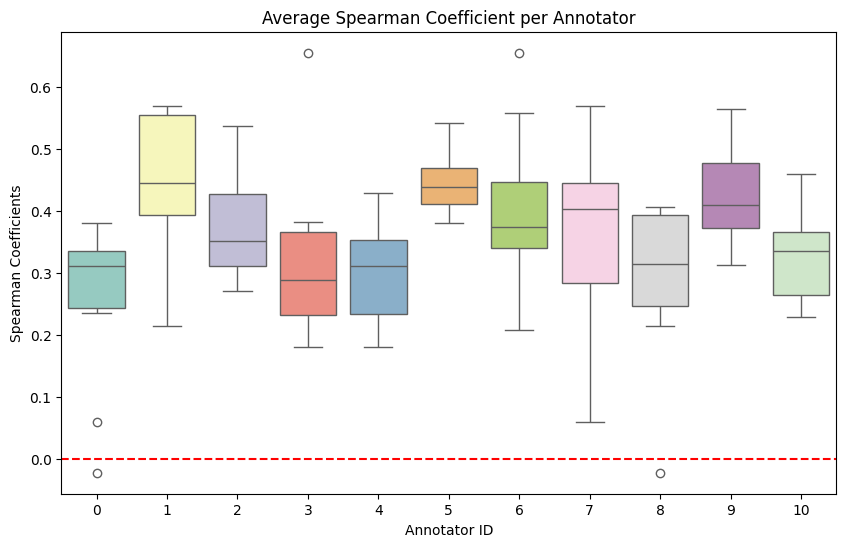

In [53]:
data = {
    "Annotator": [],
    "Spearman Coefficient": []
}

for annotator, coefficients in spearman_corr.items():
    data["Annotator"].extend([annotator] * len(coefficients))
    data["Spearman Coefficient"].extend(coefficients)

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Annotator", y="Spearman Coefficient", palette="Set3")
plt.axhline(0, color='red', linestyle='--')  # Add a red dashed line at 0 for reference
plt.title("Average Spearman Coefficient per Annotator")
plt.xlabel("Annotator ID")
plt.ylabel("Spearman Coefficients")
plt.show()